In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Engine/Connection
user = 'postgres'
pswd = 'postgres'
host = 'localhost'
port = '5432'
database = 'EmployeeSQL'
engine = create_engine(f'postgresql+psycopg2://{user}:{pswd}@{host}:{port}/{database}')
connection = engine.connect()

In [3]:
# Saving salaries as pandas database, only relevent attributes
salaries = pd.read_sql("SELECT emp_no, salary FROM salaries", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


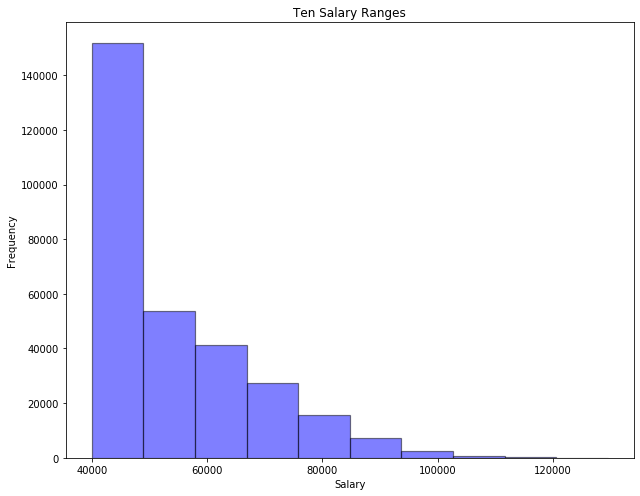

In [4]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist(salaries.salary, bins=10, facecolor='blue', alpha=0.5, ec='black', lw=1.2) 
ax.set_title('Ten Salary Ranges')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('Salary_Ranges.png')
plt.show()

In [5]:
# Saving titles as pandas database, only relevent attributes
titles = pd.read_sql("SELECT emp_no, title FROM titles", connection)
titles.head()

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer


In [6]:
# Merging Salaries and titles
salaries_titles = pd.merge(salaries, titles, how='inner', on='emp_no')
salaries_titles.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer


In [7]:
average_salaries = salaries_titles.drop(columns='emp_no').groupby('title').mean().reset_index()
average_salaries

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


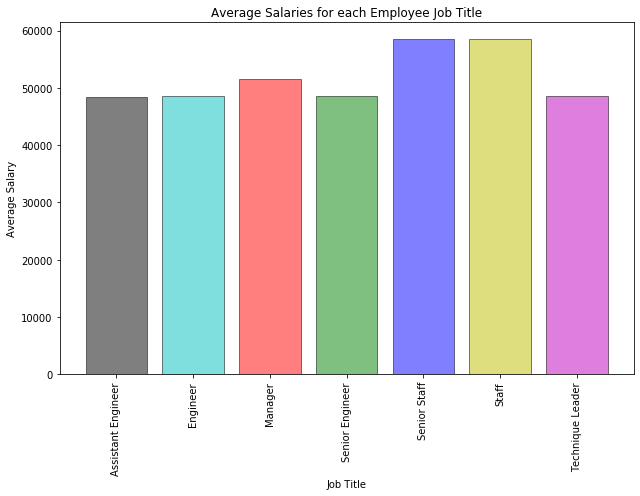

In [8]:
category = average_salaries.title
height = average_salaries.salary
fig, ax = plt.subplots(figsize=(9,7))
ax.bar(category, height, color=['k', 'c', 'r', 'g', 'b', 'y', 'm'], alpha=0.5, ec='black', lw=1)
plt.xticks(category, rotation="vertical")
ax.set_title('Average Salaries for each Employee Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Average Salary')
plt.tight_layout()
plt.savefig('Average_Salaries.png')
plt.show()

## Trends
* A very large portion of employees make the lowest salary range 40,000 ~ 48,000
* Average salaries by titles do not make sense: 
    - **_Senior Staff_** and **_Staff_** make the highest, and about the same on average
    - **_Senior Engineers_** make less than **_Engineers_** on average...and **_Assistant Engineers_**, **_Engineers_**, **_Senior Engineers_** all make about the same on average